# Data Analytics Dashboard for Coordinators

## The Coordinator can perform the following actions:

### (I) Look at the following tables:
- User Table which contains information about students, coordinators, their age, gender and the refugee camps they are based.
- Exam Table which contains information about the students' exam scores and their feedback
- Multiple Choice Questions (MCQ) Table which contains all the questions from second section, the true answers of the questions
- Answers of every student corresponding to every question from the MCQ section
- Truth Table containing answers of every student whether they were correct or not

### (II) Analysis of Exam Scores:
- Histogram plots for first, second, third section for the whole group 
- Identify which questions were the hardest 
- Average time taken to finish the exam
- Can indentify which students scored the highest and which students scored the least

### (III) Cheating Notification:
- A table is displayed if two students have exactly the same answers with exactly the same time taken to finish the exam

### (IV) Sentiment Analysis on Feedback provided by students:
- Sentiment Analysis is performed on the feedback text data provided by the students: Polarity for the text varies between -1 and +1 where +1 implies extremly positive and -1 implies extremly negative
- WordCloud corresponding to the most frequest used words in the feedback is shown

### (V) Enter and visualize Attendance:
- Coordinator can input the attendance percentage of a student and view a pie chart accordingly


# The code begins here:

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

## User Table

In [2]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/users"
querystring = {"include":"refugeeCampId"}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [3]:
output = response.text

In [4]:
response_dict = json.loads(output)

In [5]:
df_response = pd.DataFrame(response_dict)

In [6]:
trial = []

In [7]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_usertable = pd.concat(trial, ignore_index=True)


In [8]:
final_df_usertable

,objectId,username,phone,role,name,surName,createdAt,updatedAt,address,age,refugeeCampId,description,gender,ACL,emailVerified
0,e1lEFJC3hK,giada,415-392-0202,student,Giada,Fallo,2021-10-27T11:01:56.071Z,2021-11-19T20:08:08.991Z,4626 Elk Street Anaheim California 92805,19,RGDifmMQAi,highschool student,Female,NaN,NaN
1,aZ0gXwjlNK,namrata,415-392-0203,student,Namrata,Gurung,2021-10-27T11:04:59.861Z,2021-11-19T20:08:11.562Z,3166 Pine Street Sheakleyville Pennsylvania 16151,18,RGDifmMQAi,want to improve herself more in education,Female,NaN,NaN
2,Zs9uCTRg59,marta,415-392-0204,student,Marta,Bonilla,2021-10-27T11:05:42.396Z,2021-11-19T20:02:11.651Z,2419 Chipmunk Lane Portland Maine 04101,17,RGDifmMQAi,university student.,Female,NaN,NaN
3,zy2Iymim8g,gioele,415-392-0205,student,Gioele,Monopoli,2021-10-27T11:06:24.032Z,2021-11-19T20:02:13.932Z,4013 Augusta Park Mullens West Virginia 25882,16,RGDifmMQAi,no background on education.,Male,NaN,NaN
4,khUX3max7b,juliet,415-392-0206,student,Juliet,Gisemba,2021-10-27T11:07:53.454Z,2021-11-03T19:55:33.998Z,653 Arlington Avenue Little Rock AR Arkansas 7...,15,RGDifmMQAi,Highschool student with strong passion,Female,NaN,True
5,xo7xcIt3Yq,emrecan,415-392-0207,coordinator,Emrecan,Ozkan,2021-10-27T11:08:22.792Z,2021-11-11T08:17:06.241Z,3079 Flint Street,22,RGDifmMQAi,Highschool student with strong passion,Male,NaN,NaN
6,YJxMmeKFYG,karim,415-392-0207,coordinator,Karim,Tutor,2021-11-10T11:08:36.131Z,2021-11-11T08:17:19.394Z,359 Essex Court,21,RGDifmMQAi,Highschool student with strong passion,Male,NaN,NaN
7,vcM0w26xi6,zakia,415-392-0207,student,Zakia,Student,2021-11-10T11:08:53.952Z,2021-11-11T08:17:22.978Z,349 Rhapsody Street,20,RGDifmMQAi,Highschool student with strong passion,Female,NaN,NaN


## Exam Table

In [9]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/UserExam"
querystring = {"include":"userId", "include":"examId"}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [10]:
output = response.text

In [11]:
response_dict = json.loads(output)

In [12]:
df_response = pd.DataFrame(response_dict)

In [13]:
trial = []

In [14]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_examtable = pd.concat(trial, ignore_index=True)


In [15]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection
0,MZiDmknBr3,100,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60,80,8
1,CH0hVcqi5S,70,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45,80,8
2,tNSNzAvzZi,65,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-26T05:53:24.634Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50,80,13
3,NOzD7Smsqe,55,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35,40,17
4,ozC9SB1b0f,100,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75,80,15
5,1Bgpkc7lXt,40,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80,60,16


In [16]:
final_df_examtable["overall_score"] = final_df_examtable["firstSection"] + final_df_examtable["secondSection"] + final_df_examtable["thirdSection"]

In [17]:
final_df_examtable["overall_score_percentage"] = (final_df_examtable["overall_score"]/300) * 100

In [18]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage
0,MZiDmknBr3,100,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60,80,8,240,80.000000
1,CH0hVcqi5S,70,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45,80,8,195,65.000000
2,tNSNzAvzZi,65,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-26T05:53:24.634Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50,80,13,195,65.000000
3,NOzD7Smsqe,55,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35,40,17,130,43.333333
4,ozC9SB1b0f,100,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75,80,15,255,85.000000
5,1Bgpkc7lXt,40,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80,60,16,180,60.000000


## Average time taken to finish the exam

In [19]:
final_df_examtable["totalTimeToFinishSecondSection"].mean()

12.833333333333334

In [20]:
len(final_df_examtable)

6

In [21]:
final_df_examtable["gender"] = 0
final_df_examtable["age"] = 0
final_df_examtable["username"] = 0

In [22]:
for i in range(len(final_df_examtable)):
    for j in range(len(final_df_usertable)):
        if (final_df_examtable['userId'][i]==final_df_usertable["objectId"][j]):
            final_df_examtable["gender"][i] = final_df_usertable["gender"][j]
            final_df_examtable["age"][i] = final_df_usertable["age"][j]
            final_df_examtable["username"][i] = final_df_usertable["username"][j]

<ipython-input-22-56e3877e36bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_examtable["gender"][i] = final_df_usertable["gender"][j]
C:\Users\namra\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-22-56e3877e36bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_examtable["age"][i] = final_df_usertable[

In [23]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage,gender,age,username
0,MZiDmknBr3,100,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60,80,8,240,80.000000,Female,20,zakia
1,CH0hVcqi5S,70,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45,80,8,195,65.000000,Female,19,giada
2,tNSNzAvzZi,65,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-26T05:53:24.634Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50,80,13,195,65.000000,Female,15,juliet
3,NOzD7Smsqe,55,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35,40,17,130,43.333333,Male,16,gioele
4,ozC9SB1b0f,100,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75,80,15,255,85.000000,Female,17,marta
5,1Bgpkc7lXt,40,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80,60,16,180,60.000000,Female,18,namrata


# Analysis of the Exam Scores

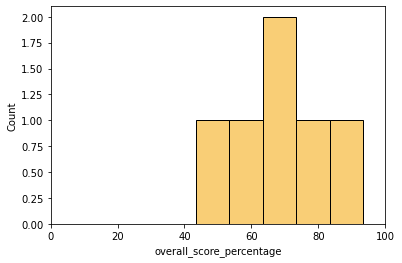

In [24]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="overall_score_percentage", color="#F8BE48", binwidth=10, ax = ax)
ax.set_xlim(0,100)
plt.show()
#fig.savefig("overallscorepercentage.png")

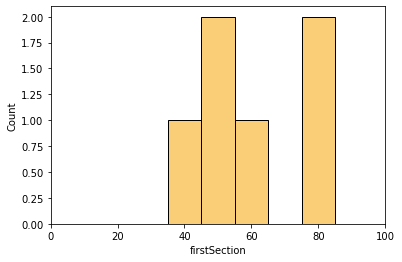

In [25]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="firstSection", color="#F8BE48", binwidth=10)
ax.set_xlim(0,100)
plt.show()

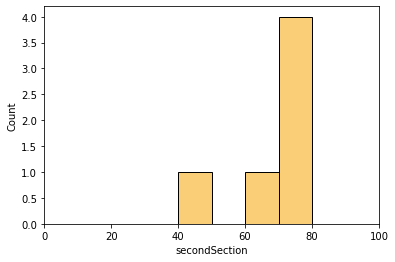

In [26]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="secondSection", color="#F8BE48", binwidth = 10)
ax.set_xlim(0,100)
plt.show()

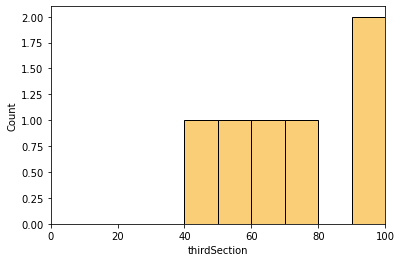

In [27]:
fig, ax = plt.subplots()
sns.histplot(data=final_df_examtable, x="thirdSection", color="#F8BE48", binwidth = 10)
ax.set_xlim(0,100)
plt.show()

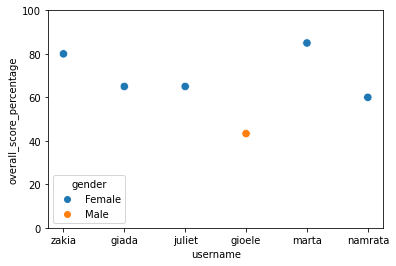

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=final_df_examtable, x="username", y="overall_score_percentage", hue="gender", s = 70)
ax.set_ylim(0,100)
plt.show()
#fig.savefig("gender_marks.png")

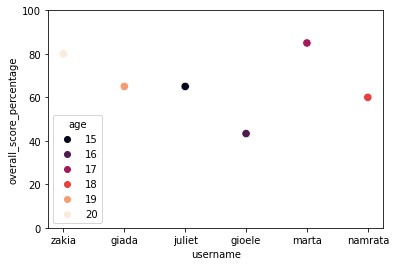

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data=final_df_examtable, x="username", y="overall_score_percentage", hue="age", s = 70, palette = "rocket")
ax.set_ylim(0,100)
plt.show()
fig.savefig("age_marks.png")

# Multiple Choice Questions Table

In [56]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/MultipleChoiceQuestion"
querystring = {}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [57]:
output = response.text

In [58]:
response_dict = json.loads(output)

In [59]:
df_response = pd.DataFrame(response_dict)

In [60]:
trial = []

In [61]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_MCQtable = pd.concat(trial, ignore_index=True)


In [64]:
final_df_MCQtable

,objectId,answerA,question,answerB,answerC,answerD,trueAnswer,createdAt,updatedAt,examId
0,HZQ9LBYy07,4,What is 2 + 2?,2,3,1,1,2021-10-27T12:31:59.064Z,2021-10-28T07:54:20.256Z,1EKKLfkBDR
1,XxfMEUBz2K,8,What is 4 + 4?,10,12,14,1,2021-10-27T12:42:19.886Z,2021-10-28T07:54:24.674Z,1EKKLfkBDR
2,KraRmlAdki,15,What is 5 + 5?,20,5,10,4,2021-10-27T12:43:11.208Z,2021-10-28T07:54:21.728Z,1EKKLfkBDR
3,4qItIo2aSp,12,What is 8 + 5?,13,16,25,2,2021-10-27T12:43:47.227Z,2021-10-28T07:54:28.196Z,1EKKLfkBDR
4,A7VehTbDkj,36,What is 10 + 4?,20,14,25,3,2021-10-28T07:54:00.535Z,2021-10-29T08:44:04.911Z,1EKKLfkBDR


In [63]:
#remove NaN columns and unidentifiable rows (temporary fix as last columns and rows were added last minute)
final_df_MCQtable = final_df_MCQtable.iloc[:, :-10]
final_df_MCQtable = final_df_MCQtable.head(-3)

# MCQ answers of all users

In [65]:
url = "https://inzone-c-parse.tools.deployimpact.ch/parse/classes/UserMCQAnswer"
querystring = {}
payload = ""
headers = {
    'X-Parse-Application-Id': "inzonec"
    }
response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
#print(response.text)

In [66]:
output = response.text

In [67]:
response_dict = json.loads(output)

In [68]:
df_response = pd.DataFrame(response_dict)

In [69]:
trial = []

In [70]:
for i in range(len(df_response)):
    ck = pd.DataFrame(df_response.results[i])
    trial.append(ck[ck.index == 'objectId'])
    
final_df_MCQAns = pd.concat(trial, ignore_index=True)

In [71]:
final_df_MCQAns

,objectId,answer,howManySecondsPassed,questionId,userId,createdAt,updatedAt
0,V5CJCArRvZ,1,1,HZQ9LBYy07,vcM0w26xi6,2021-11-18T14:07:47.456Z,2021-11-18T14:07:47.456Z
1,DrGD2RUHdP,2,2,XxfMEUBz2K,vcM0w26xi6,2021-11-18T14:07:49.346Z,2021-11-18T14:07:49.346Z
2,aNQ78oBfPi,4,1,KraRmlAdki,vcM0w26xi6,2021-11-18T14:07:50.776Z,2021-11-18T14:07:50.776Z
3,tMTWPB61Dy,2,2,4qItIo2aSp,vcM0w26xi6,2021-11-18T14:07:52.318Z,2021-11-18T14:07:52.318Z
4,gG2gDSn6t1,3,2,A7VehTbDkj,vcM0w26xi6,2021-11-18T14:07:54.546Z,2021-11-18T14:07:54.546Z
5,eInMMXdyPf,1,1,HZQ9LBYy07,e1lEFJC3hK,2021-11-19T07:45:27.348Z,2021-11-19T07:45:48.550Z
6,WYQ9CeFxHz,2,2,XxfMEUBz2K,e1lEFJC3hK,2021-11-19T07:45:28.909Z,2021-11-19T07:45:28.909Z
7,JiA6gQ35zA,4,1,KraRmlAdki,e1lEFJC3hK,2021-11-19T07:45:32.939Z,2021-11-19T07:45:50.049Z
8,GU8WxVdWGK,2,2,4qItIo2aSp,e1lEFJC3hK,2021-11-19T07:45:34.621Z,2021-11-19T07:45:59.455Z
9,DQTLDSGooC,3,2,A7VehTbDkj,e1lEFJC3hK,2021-11-19T07:45:36.899Z,2021-11-19T07:45:36.899Z


In [72]:
questions = final_df_MCQAns['questionId'].unique()

In [73]:
questions

array(['HZQ9LBYy07', 'XxfMEUBz2K', 'KraRmlAdki', '4qItIo2aSp',
       'A7VehTbDkj'], dtype=object)

In [74]:
users = final_df_MCQAns['userId'].unique()

In [75]:
users

array(['vcM0w26xi6', 'e1lEFJC3hK', 'zy2Iymim8g', 'Zs9uCTRg59',
       'aZ0gXwjlNK', 'khUX3max7b'], dtype=object)

In [76]:
w, h = len(questions), len(users)
Matrix = [[0 for x in range(w)] for y in range(h)] 

In [77]:
for i in range(h):
    for j in range(w):
        row = final_df_MCQAns[(final_df_MCQAns['questionId']==questions[j]) & (final_df_MCQAns['userId']==users[i])]
        if not row.empty:
            Matrix[i][j] = row["answer"]

In [78]:
final_df_userans = pd.DataFrame(Matrix)

In [79]:
final_df_userans

,0,1,2,3,4
0,"0 1 Name: answer, dtype: int64","1 2 Name: answer, dtype: int64","2 4 Name: answer, dtype: int64","3 2 Name: answer, dtype: int64","4 3 Name: answer, dtype: int64"
1,"5 1 Name: answer, dtype: int64","6 2 Name: answer, dtype: int64","7 4 Name: answer, dtype: int64","8 2 Name: answer, dtype: int64","9 3 Name: answer, dtype: int64"
2,"10 1 Name: answer, dtype: int64","11 2 Name: answer, dtype: int64","12 1 Name: answer, dtype: int64","13 2 Name: answer, dtype: int64","14 4 Name: answer, dtype: int64"
3,"15 1 Name: answer, dtype: int64","16 1 Name: answer, dtype: int64","17 4 Name: answer, dtype: int64","18 2 Name: answer, dtype: int64","19 2 Name: answer, dtype: int64"
4,"20 1 Name: answer, dtype: int64","21 3 Name: answer, dtype: int64","22 1 Name: answer, dtype: int64","23 2 Name: answer, dtype: int64","24 3 Name: answer, dtype: int64"
5,"25 2 Name: answer, dtype: int64","26 1 Name: answer, dtype: int64","27 4 Name: answer, dtype: int64","28 2 Name: answer, dtype: int64","29 3 Name: answer, dtype: int64"


In [80]:
for i in range(final_df_userans.shape[1]):
    final_df_userans = final_df_userans.rename(columns={i: questions[i]})

In [81]:
for j in range(final_df_userans.shape[0]):
    final_df_userans = final_df_userans.rename(index={j: users[j]})

In [82]:
final_df_userans = final_df_userans.astype(int)

In [83]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3
zy2Iymim8g,1,2,1,2,4
Zs9uCTRg59,1,1,4,2,2
aZ0gXwjlNK,1,3,1,2,3
khUX3max7b,2,1,4,2,3


In [84]:
duplicate_answers = final_df_userans[final_df_userans.duplicated(keep=False)]

In [85]:
duplicate_answers

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3


In [86]:
duplicate_answers["timetaken"]=0
duplicate_answers["username"]=""

<ipython-input-86-5cf6e91a42af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["timetaken"]=0
<ipython-input-86-5cf6e91a42af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["username"]=""


In [87]:
for i in range(len(duplicate_answers)):
    for j in range(len(final_df_examtable)):
        if (pd.isna(final_df_examtable["totalTimeToFinishSecondSection"][j]) == False):
            if (final_df_userans.index[i]==final_df_examtable["userId"][j]):
                duplicate_answers["timetaken"][i] = final_df_examtable["totalTimeToFinishSecondSection"][j]
                duplicate_answers["username"][i] = final_df_examtable["username"][j]

<ipython-input-87-8ee773fb3143>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_answers["timetaken"][i] = final_df_examtable["totalTimeToFinishSecondSection"][j]
C:\Users\namra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-87-8ee773fb3143>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplica

## Cheating Notification

In [88]:
duplicate_answers

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj,timetaken,username
vcM0w26xi6,1,2,4,2,3,8,zakia
e1lEFJC3hK,1,2,4,2,3,8,giada


In [89]:
new_row = final_df_MCQtable["trueAnswer"]

In [90]:
new_row.index = final_df_MCQtable["objectId"]

In [91]:
final_df_userans = final_df_userans.append(new_row)

In [92]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3
zy2Iymim8g,1,2,1,2,4
Zs9uCTRg59,1,1,4,2,2
aZ0gXwjlNK,1,3,1,2,3
khUX3max7b,2,1,4,2,3
trueAnswer,1,1,4,2,3


In [93]:
max_score_per_question = 100/len(questions)

In [94]:
max_score_per_question

20.0

In [95]:
final_df_userans

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,2,4,2,3
e1lEFJC3hK,1,2,4,2,3
zy2Iymim8g,1,2,1,2,4
Zs9uCTRg59,1,1,4,2,2
aZ0gXwjlNK,1,3,1,2,3
khUX3max7b,2,1,4,2,3
trueAnswer,1,1,4,2,3


In [96]:
Matrix = [[0 for x in range(final_df_userans.shape[1])] for y in range(final_df_userans.shape[0]-1)] 

In [97]:
Matrix

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [98]:
ta = final_df_userans[final_df_userans.index == "trueAnswer"]

for i in range(final_df_userans.shape[0]-1):
    for j in range(final_df_userans.shape[1]):
        Matrix[i][j] = (final_df_userans[final_df_userans.columns[j]][i]==ta[ta.columns[j]][0])

In [99]:
Matrix

[[True, False, True, True, True],
 [True, False, True, True, True],
 [True, False, False, True, False],
 [True, True, True, True, False],
 [True, False, False, True, True],
 [False, True, True, True, True]]

In [100]:
final_df_ta = pd.DataFrame(Matrix)

In [101]:
final_df_ta

,0,1,2,3,4
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,False,True,False
3,True,True,True,True,False
4,True,False,False,True,True
5,False,True,True,True,True


In [102]:
for i in range(final_df_ta.shape[1]):
    final_df_ta = final_df_ta.rename(columns={i: questions[i]})

In [103]:
for j in range(final_df_ta.shape[0]):
    final_df_ta = final_df_ta.rename(index={j: users[j]})

In [104]:
final_df_ta = final_df_ta.astype(int)

## Truth Table

In [105]:
final_df_ta

,HZQ9LBYy07,XxfMEUBz2K,KraRmlAdki,4qItIo2aSp,A7VehTbDkj
vcM0w26xi6,1,0,1,1,1
e1lEFJC3hK,1,0,1,1,1
zy2Iymim8g,1,0,0,1,0
Zs9uCTRg59,1,1,1,1,0
aZ0gXwjlNK,1,0,0,1,1
khUX3max7b,0,1,1,1,1


In [106]:
sum_ques = final_df_ta.sum(axis=0)

In [107]:
sum_ques

HZQ9LBYy07    5
XxfMEUBz2K    2
KraRmlAdki    4
4qItIo2aSp    6
A7VehTbDkj    4
dtype: int64

In [108]:
## Hardest Questions

In [109]:
hard_ques_score = sum_ques.min()
print(hard_ques_score)
for i in range(len(sum_ques)):
    if (sum_ques[i]==hard_ques_score):
        print(sum_ques.index[i])
        for j in range(len(final_df_MCQtable)):
            if (sum_ques.index[i]==final_df_MCQtable["objectId"][j]):
                print(final_df_MCQtable["question"][j])

2
XxfMEUBz2K
What is 4 + 4?


In [110]:
sum_ans = final_df_ta.sum(axis=1)

In [111]:
sum_ans = sum_ans*max_score_per_question

In [112]:
sum_ans.index

Index(['vcM0w26xi6', 'e1lEFJC3hK', 'zy2Iymim8g', 'Zs9uCTRg59', 'aZ0gXwjlNK',
       'khUX3max7b'],
      dtype='object')

## Highest Scores

In [113]:
max_score = sum_ans.max()
print(max_score)
for i in range(len(sum_ans)):
    if (sum_ans[i]==max_score):
        print(sum_ans.index[i])
        for j in range(len(final_df_examtable)):
            if (sum_ans.index[i]==final_df_examtable["userId"][j]):
                print(final_df_examtable["username"][j])

80.0
vcM0w26xi6
zakia
e1lEFJC3hK
giada
Zs9uCTRg59
marta
khUX3max7b
juliet


## Minimum Scores

In [114]:
min_score = sum_ans.min()
print(min_score)
for i in range(len(sum_ans)):
    if (sum_ans[i]==min_score):
        print(sum_ans.index[i])
        for j in range(len(final_df_examtable)):
            if (sum_ans.index[i]==final_df_examtable["userId"][j]):
                print(final_df_examtable["username"][j])

40.0
zy2Iymim8g
gioele


# Sentiment Analysis on Feedback Text and Wordcloud

In [115]:
import spacy

In [116]:
#pip install spacytextblob

In [117]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [118]:
nlp = spacy.load("en_core_web_sm")

In [119]:
final_df_examtable

,objectId,thirdSection,userId,examId,createdAt,updatedAt,optionalFeedback,capstoneProjectTextFeedback,firstSection,secondSection,totalTimeToFinishSecondSection,overall_score,overall_score_percentage,gender,age,username
0,MZiDmknBr3,100,vcM0w26xi6,1EKKLfkBDR,2021-11-11T08:18:24.227Z,2021-11-19T07:53:48.290Z,MCQ section was very hard! The live question s...,I am very very happy to finish this course.,60,80,8,240,80.000000,Female,20,zakia
1,CH0hVcqi5S,70,e1lEFJC3hK,1EKKLfkBDR,2021-11-19T07:31:58.321Z,2021-11-19T20:00:20.882Z,I have to work hard on those questions.,The course was awesome.,45,80,8,195,65.000000,Female,19,giada
2,tNSNzAvzZi,65,khUX3max7b,1EKKLfkBDR,2021-11-19T19:55:37.807Z,2021-11-26T05:53:24.634Z,Neither good nor bad. It was a normal exam.,I am very happy to finish this course.,50,80,13,195,65.000000,Female,15,juliet
3,NOzD7Smsqe,55,zy2Iymim8g,1EKKLfkBDR,2021-11-19T20:03:28.131Z,2021-11-19T20:05:05.991Z,I had a hard time. Why did you ask so hard?,"Although the course was good, unfortunately I ...",35,40,17,130,43.333333,Male,16,gioele
4,ozC9SB1b0f,100,Zs9uCTRg59,1EKKLfkBDR,2021-11-19T20:06:44.311Z,2021-11-19T20:07:52.891Z,"Some questions were easy, some were hard. I di...",I am very happy to have finished this course. ...,75,80,15,255,85.000000,Female,17,marta
5,1Bgpkc7lXt,40,aZ0gXwjlNK,1EKKLfkBDR,2021-11-19T20:09:45.272Z,2021-11-19T20:11:14.832Z,I'm not sure about some questions but I think ...,It was a better course than I thought. If I ha...,80,60,16,180,60.000000,Female,18,namrata


In [148]:
text_overall = ""
text_overall_capstoneproject = ""

In [150]:
for i in range(len(final_df_examtable)):
    text_overall+= final_df_examtable['optionalFeedback'][i]
    text_overall_capstoneproject+= final_df_examtable['capstoneProjectTextFeedback'][i]

In [151]:
text_overall

"MCQ section was very hard! The live question section was very funny.I have to work hard on those questions.Neither good nor bad. It was a normal exam.I had a hard time. Why did you ask so hard?Some questions were easy, some were hard. I did my best.I'm not sure about some questions but I think I can do better."

In [152]:
text_overall_capstoneproject

'I am very very happy to finish this course.The course was awesome.I am very happy to finish this course.Although the course was good, unfortunately I was not very good. I need to work a little more.I am very happy to have finished this course. I did my best.It was a better course than I thought. If I had a chance I would go again.'

In [154]:
#nlp.add_pipe("spacytextblob")
doc = nlp(text_overall)
print('Polarity:', doc._.polarity)
print('Sujectivity:', doc._.subjectivity)
print('Assessments:', doc._.assessments)

Polarity: -0.014938446969696964
Sujectivity: 0.6056712962962963
Assessments: [(['very', 'hard', '!'], -0.47395833333333337, 0.7041666666666666, None), (['live'], 0.13636363636363635, 0.5, None), (['very'], 0.2, 0.3, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['good'], 0.7, 0.6000000000000001, None), (['bad'], -0.6999999999999998, 0.6666666666666666, None), (['normal'], 0.15, 0.6499999999999999, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['not', 'sure'], -0.25, 0.8888888888888888, None), (['better'], 0.5, 0.5, None)]


In [155]:
#nlp.add_pipe("spacytextblob")
doc = nlp(text_overall_capstoneproject)
print('Polarity:', doc._.polarity)
print('Sujectivity:', doc._.subjectivity)
print('Assessments:', doc._.assessments)

Polarity: 0.4054086538461539
Sujectivity: 0.7576923076923077
Assessments: [(['very', 'very', 'happy'], 1.0, 1.0, None), (['very', 'happy'], 1.0, 1.0, None), (['good'], 0.7, 0.6000000000000001, None), (['unfortunately'], -0.5, 1.0, None), (['not', 'very', 'good'], -0.26923076923076916, 0.46153846153846156, None), (['little'], -0.1875, 0.5, None), (['very', 'happy'], 1.0, 1.0, None), (['better'], 0.5, 0.5, None)]


In [141]:
from textblob import TextBlob
blob = TextBlob(text_overall)
print(blob.sentiment_assessments.polarity)
print(blob.sentiment_assessments.subjectivity)
print(blob.sentiment_assessments.assessments)

-0.014938446969696964
0.6056712962962963
[(['very', 'hard', '!'], -0.47395833333333337, 0.7041666666666666, None), (['live'], 0.13636363636363635, 0.5, None), (['very'], 0.2, 0.3, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['good'], 0.7, 0.6000000000000001, None), (['bad'], -0.6999999999999998, 0.6666666666666666, None), (['normal'], 0.15, 0.6499999999999999, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['easy'], 0.43333333333333335, 0.8333333333333334, None), (['hard'], -0.2916666666666667, 0.5416666666666666, None), (['not', 'sure'], -0.25, 0.8888888888888888, None), (['better'], 0.5, 0.5, None)]


In [156]:
blob = TextBlob(text_overall_capstoneproject)
print(blob.sentiment_assessments.polarity)
print(blob.sentiment_assessments.subjectivity)
print(blob.sentiment_assessments.assessments)

0.4054086538461539
0.7576923076923077
[(['very', 'very', 'happy'], 1.0, 1.0, None), (['very', 'happy'], 1.0, 1.0, None), (['good'], 0.7, 0.6000000000000001, None), (['unfortunately'], -0.5, 1.0, None), (['not', 'very', 'good'], -0.26923076923076916, 0.46153846153846156, None), (['little'], -0.1875, 0.5, None), (['very', 'happy'], 1.0, 1.0, None), (['better'], 0.5, 0.5, None)]


In [132]:
#pip install wordcloud

In [133]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 1919.5, 1079.5, -0.5)

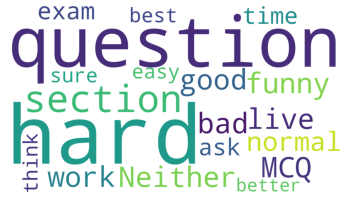

In [144]:
wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
wc.generate_from_text(text_overall)
plt.imshow(wc)
plt.axis("off")

(-0.5, 1919.5, 1079.5, -0.5)

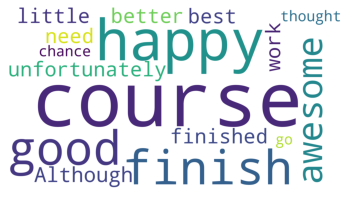

In [157]:
wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
wc.generate_from_text(text_overall_capstoneproject)
plt.imshow(wc)
plt.axis("off")

# Visualize Attendance  

In [146]:
attendance = int(input("Enter attendance percentage:"))

Enter attendance percentage:70


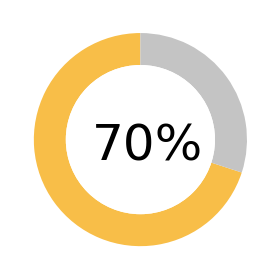

In [147]:
# Pie chart
sizes = [attendance,100-attendance]
#colors
colors = ["#F8BE48",'#c4c4c4']
#explsion
#explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, startangle=90, pctdistance=0.85) #autopct='%1.1f%%'
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.gca().add_artist(centre_circle)
plt.text(0.28, 0.45, str(attendance)+'%', fontsize=50, horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes)

# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
plt.show()
